In [1115]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES, smiles_to_fold

train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [1116]:
# SME - all test(separate model for each molecule)
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.41, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.266, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# SME - all test(separate model for each molecule) / fixed CF3
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# SME - all test(separate model for each molecule) / fixed CF3 / modified
relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.207, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.519, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.491, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -4.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# LRP - all test(separate model for each molecule) / fixed CF3
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': 0.009, 'O=C(O)C1CCCCC1': 0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.012, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.012, 'O=C(O)C1CCC1': 0, 'O=C(O)C1(CF)CCC1': 0.001, 'O=C(O)C1(C(F)F)CCC1': -0.043, 'O=C(O)C1(C(F)(F)F)CCC1': -0.039, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.04, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.04, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.029, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.029, 'O=C(O)[C@H]1C[C@H](CF)C1': 0.013, 'O=C(O)[C@H]1C[C@@H](CF)C1': 0.013, 'O=C(O)C1CC1(F)F': -0.006, 'O=C(O)C1CCC1(F)F': -0.004, 'O=C(O)C1CC(F)(F)C1': 0.017, 'O=C(O)C1CCCC1(F)F': -0.009, 'O=C(O)C1CCC(F)(F)C1': 0.009, 'O=C(O)C1CCCCC1(F)F': -0.002, 'O=C(O)C1CCCCCC1(F)F': 0.003, 'O=C(O)C1CCCCC(F)(F)C1': 0.011, 'O=C(O)C1CCCC(F)(F)CC1': 0.008, 'CCC(F)(F)CC(=O)O': 0.004, 'CC(F)(F)CCC(=O)O': 0.026, 'O=C(O)C1CC1': 0, 'O=C(O)C1CCCC1': 0, 'O=C(O)C1CCCCCC1': 0, 'CCCCC(=O)O': 0, 'O=C(O)C1CC2(CCC2)C1': 0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': 0.024, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.041, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.026, 'O=C(O)[C@@H]1CC[C@H]1CF': 0.023, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.035, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.035, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.03, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.03, 'O=C(O)[C@@H]1C[C@H]1CF': 0.025, 'C[C@@H]1C[C@H]1C(=O)O': 0, 'C[C@@H]1C[C@@H]1C(=O)O': 0, 'O=C(O)C1C(F)(F)C12CC2': -0.007, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.04, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.037, 'NC1CCC(F)(F)CC1': 0.043, 'NC1CCCCC1': -0.032, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': -0.023, 'N[C@H]1C[C@@H]2C[C@@H]2C1': -0.01, 'FC(F)(F)C12CC(CN1)C2': 0.026, 'C1NC2CC1C2': 0.037, 'C1CCNC1': 0.019, 'CC12CC(CN1)C2': 0.025, 'FC(F)(F)C12CCC(CC1)CN2': 0.027, 'C1CC2CC1CN2': 0.02, 'C1CC2CCC1CN2': 0.016, 'C1CCNCC1': 0.01, 'FC(F)(F)C12CCCC(CN1)C2': 0.022, 'C1CC2CNC(C1)C2': 0.019, 'FC1(F)CC2CNCC(C2)C1': 0.035, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.049, 'FC1(F)C2CCCC1CNC2': 0.022, 'C1CC2CNCC(C1)C2': 0.006, 'FC1(F)C2CNCC1COC2': 0.034, 'C1NCC2COCC1C2': -0.026, 'C1CC2CNCC1C2': 0.005, 'C1CNC1': 0.046, 'FC1(F)CNC1': 0.042, 'FC1CCNC1': -0.003, 'FC1(F)CCNC1': 0.038, 'F[C@@H]1CNC[C@@H]1F': 0.056, 'F[C@@H]1CNC[C@H]1F': 0.046, 'FC1CCCNC1': 0.025, 'FC1(F)CCCNC1': 0.026, 'F[C@@H]1CNC[C@H](F)C1': 0.085, 'F[C@@H]1CNC[C@@H](F)C1': 0.072, 'FC1CCNCC1': 0.012, 'F[C@@H]1CCNC[C@@H]1F': 0.057, 'F[C@@H]1CCNC[C@H]1F': 0.06, 'NC1(C(F)(F)F)CCC1': 0.022, 'NC1(C(F)F)CCC1': 0.031, 'NC1(CF)CCC1': 0.061, 'NC1CCC1': -0.069, 'N[C@H]1C[C@H](C(F)(F)F)C1': 0.03, 'N[C@H]1C[C@@H](C(F)(F)F)C1': 0.032, 'N[C@H]1C[C@H](C(F)F)C1': 0.024, 'N[C@H]1C[C@@H](C(F)F)C1': 0.022, 'N[C@H]1C[C@H](CF)C1': 0.025, 'N[C@H]1C[C@@H](CF)C1': 0.021, 'FC(F)C1CCCCN1': 0.016, 'FC(F)C1CCCN1': 0.013, 'FC(F)(F)C1CCN1': 0.025, 'FC(F)C1CCN1': 0.021, 'NCCF': 0.059, 'FC(F)(F)C1CCCNC1': 0.022, 'FC(F)C1CCCNC1': 0.018, 'FCC1CCCNC1': 0.02, 'FC(F)C1CCNC1': 0.015, 'FCC1CCNC1': 0.019, 'FC(F)(F)C1CNC1': 0.03, 'FC(F)C1CNC1': 0.001, 'FCC1CNC1': 0.017, 'NCCC(F)F': 0.032, 'NCCCF': 0.039, 'CCN': 0.019, 'FC(F)C1CCNCC1': 0.016, 'FCC1CCNCC1': 0.025, 'NCCCCF': 0.033, 'NCCCC(F)F': 0.026, 'NCCCC(F)(F)F': 0.03, 'CCCN': 0.032, 'NC1CCC1(F)F': 0.038, 'NC1CC(F)(F)C1': 0.044, 'NC1CCCCC1(F)F': 0.024, 'NC1CCCC(F)(F)C1': 0.039, 'NC1CCCCCC1(F)F': 0.026, 'NC1CCCCC(F)(F)C1': 0.036, 'NC1CCCC(F)(F)CC1': 0.038, 'CCC(F)(F)CN': 0.044, 'CC(F)(F)CCN': 0.037, 'NC1CC1': -0.096, 'NC1CCCC1': -0.072, 'NC1CCCCCC1': -0.049, 'NC1CC2(CCC2)C1': -0.012, 'NC1CC2(C1)CC(F)(F)C2': 0.057, 'N[C@@H]1CC[C@H]1C(F)(F)F': 0.037, 'N[C@@H]1CC[C@H]1CF': 0.03, 'N[C@@H]1C[C@H]1C(F)(F)F': 0.031, 'N[C@H]1C[C@H]1C(F)(F)F': 0.031, 'N[C@@H]1C[C@H]1C(F)F': 0.043, 'N[C@H]1C[C@H]1C(F)F': 0.042, 'C[C@@H]1C[C@H]1N': 0.002, 'NC1CC12CC2': 0.005, 'O=C(O)C1CC12CC2(F)F': 0.017, 'O=C(O)C12CC(CO1)C2': 0, 'O=C(O)C1CCCC(F)(F)C1': 0.008, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0, 'O=C(O)C1CC2(CC(F)C2)C1': 0.035, 'O=C(O)C1CC12CC2': 0, 'O=C(O)CCCC(F)F': -0.032, 'FC(F)(F)C12CCC(CN1)C2': 0.024, 'FC(F)(F)C1CCCN1': 0.022, 'FC(F)(F)C1CCCCN1': 0.024, 'NC1CC12CC2(F)F': 0.041, 'NC1CCCC1(F)F': 0.025, 'FC1(F)CCNCC1': 0.038, 'FC1(F)C2CCC1CNC2': 0.022, 'NC1CCC(F)(F)C1': 0.042, 'FC1CNC1': 0.001, 'N[C@@H]1CC[C@H]1C(F)F': 0.03, 'C[C@@H]1C[C@@H]1N': -0.004, 'FCC1CCCCN1': 0.017, 'FCC1CCCN1': 0.018, 'FCC1CCN1': 0.012, 'NC1CC2(C1)CC(F)C2': 0.042, 'FC(F)(F)C1CCNCC1': 0.012, 'CCCCN': 0.013, 'CC12CCC(CC1)CN2': 0.019, 'CC12CCCC(CN1)C2': 0.025}

relevances_fluorine_all_temp = {}
for smiles, relevance in relevances_fluorine_all.items():
    relevances_fluorine_all_temp[smiles] = round(relevance, 2)
relevances_fluorine_all = relevances_fluorine_all_temp.copy()

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "secon" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

In [1117]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [1118]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    # is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

FC(F)(F)C12CC(CN1)C2 ((4, 1, 0, 2, 3),) CF3 1
C1NC2CC1C2 () non-F inf
C1CCNC1 () non-F inf
CC12CC(CN1)C2 () non-F inf
FC(F)(F)C12CCC(CC1)CN2 ((4, 1, 0, 2, 3),) CF3 1
C1CC2CC1CN2 () non-F inf
C1CC2CCC1CN2 () non-F inf
C1CCNCC1 () non-F inf
FC(F)(F)C12CCCC(CN1)C2 ((4, 1, 0, 2, 3),) CF3 1
C1CC2CNC(C1)C2 () non-F inf
FC1(F)CC2CNCC(C2)C1 ((1, 0), (1, 2)) gem-CF2 4
FC1(F)CC2CNCC(C1)C2(F)F ((1, 0), (1, 2), (10, 11), (10, 12)) gem-CF2 3
FC1(F)C2CCCC1CNC2 ((1, 0), (1, 2)) gem-CF2 3
C1CC2CNCC(C1)C2 () non-F inf
FC1(F)C2CNCC1COC2 ((1, 0), (1, 2)) gem-CF2 3
C1NCC2COCC1C2 () non-F inf
C1CC2CNCC1C2 () non-F inf
C1CNC1 () non-F inf
FC1(F)CNC1 ((1, 0), (1, 2)) gem-CF2 2
FC1CCNC1 ((1, 0),) CHF 2
FC1(F)CCNC1 ((1, 0), (1, 2)) gem-CF2 2
F[C@@H]1CNC[C@@H]1F ((1, 0), (5, 6)) CHF 2
F[C@@H]1CNC[C@H]1F ((1, 0), (5, 6)) CHF 2
FC1CCCNC1 ((1, 0),) CHF 2
FC1(F)CCCNC1 ((1, 0), (1, 2)) gem-CF2 2
F[C@@H]1CNC[C@H](F)C1 ((1, 0), (5, 6)) CHF 2
F[C@@H]1CNC[C@@H](F)C1 ((1, 0), (5, 6)) CHF 2
FC1CCNCC1 ((1, 0),) CHF 3
F[C@@

In [1119]:
# import re

# def convert_google_sheet_url(url):
#     pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

#     replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

#     new_url = re.sub(pattern, replacement, url)

#     return new_url

# import pandas as pd

# url = 'https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/edit#gid=0'

# new_url = convert_google_sheet_url(url)

# print(new_url)

# df = pd.read_csv(new_url)

# df.dropna(subset=['F Group'], inplace=True)

# smiles_to_id = {}
# for index, row in df.iterrows():
#     smiles_to_id[Chem.CanonSmiles(row['Amine/Acid SMILES'])] = row['Amine/Acid ID']

CH2F 9.67
CHF2 7.83
CF3 5.84
CH2F 9.55
CHF2 7.78
CF3 6.06
CH2F 9.52
CHF2 7.99
CF3 6.41
['CH2F', 'CHF2', 'CF3'] [[-1.1, -0.8, -1.03], [-3.02, -2.7, -2.86], [-4.15, -4.46, -3.83]]
CH2F 10.05
CHF2 9.57
CF3 8.67
CH2F 10.38
CHF2 9.75
CH2F 10.32
CHF2 9.55
CF3 9.01
['CH2F', 'CHF2', 'CF3'] [[-0.8, -0.28, -0.28], [-1.83, -0.84, -0.88], [-2.51, -1.3]]
CH2F 10.46
CHF2 10.19
CF3 9.6
['CH2F', 'CHF2', 'CF3'] [[-0.07], [-0.39], [-0.49]]


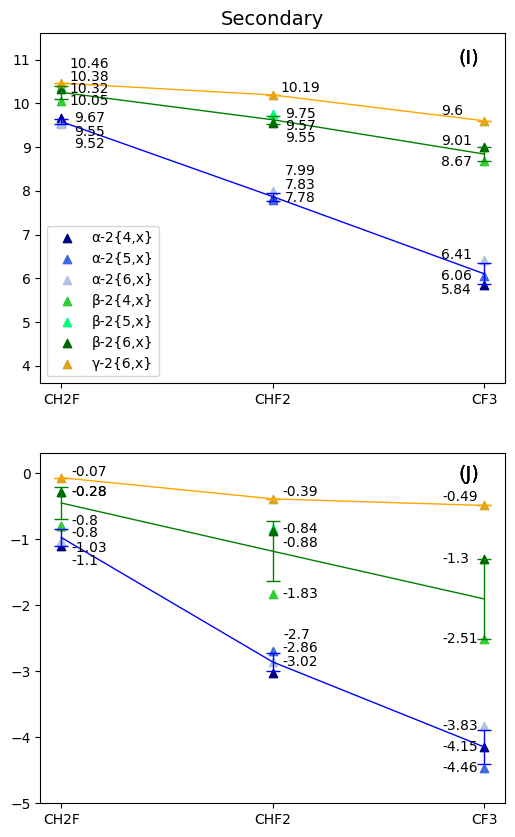

In [1120]:
import matplotlib.pyplot as plt
import numpy as np

cyclobutane_color = {1: 'navy', 2: 'limegreen', 3: 'darkorange'}
cyclopentane_color = {1: 'royalblue', 2: 'springgreen', 3: 'navajowhite'}
cyclohexan_color = {1: 'lightsteelblue', 2: 'darkgreen', 3: 'goldenrod'}
methane_color = {1: 'mediumblue', 2: 'lightgreen', 3: 'palegoldenrod'}

line_color = {1: "blue", 2: "green", 3: "orange"}

cyclobutane_name = {1: "α-2{4,x}", 2: "β-2{4,x}", 3: ""}
cyclopentane_name = {1: "α-2{5,x}", 2: "β-2{5,x}", 3: ""}
cyclohexan_name = {1: "α-2{6,x}", 2: "β-2{6,x}", 3: "γ-2{6,x}"}
methane_name = {1: "", 2: "", 3: ""}   

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))

is_chf2 = False

for distance_global in range(1, 4):
    
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    
    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        # print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -17, -3

            # print(y_logP[i], y_relevance[i])
            if len(str(y_relevance[i])) == 3 or (len(str(y_relevance[i])) == 4 and '-' in str(y_relevance[i])):
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_relevance[i] == -1.1:
                    y_shift = -14
                elif y_relevance[i] == -1.03:
                    y_shift = -8
                elif y_relevance[i] == -0.8 and is_chf2 == False:
                    y_shift = -8
                    is_chf2 = True
                elif y_relevance[i] == -0.8 and is_chf2 == True:
                    y_shift = 1
                elif y_relevance[i] == -0.07:
                    y_shift = 1
            if X_local[i] == "CHF2":
                if y_relevance[i] == -0.88:
                    y_shift = -11
                elif y_relevance[i] == -2.7:
                    y_shift = 9
                elif y_relevance[i] == -2.86:
                    y_shift = 7
                elif y_relevance[i] == -3.02:
                    y_shift = 5

                elif y_relevance[i] == -0.39:
                    y_shift = 2
            
            if X_local[i] == "CF3":
                if y_relevance[i] == -0.49:
                    y_shift = 3
                    

            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -20, -3
            
            if len(str(y_logP[i])) == 3 or (len(str(y_logP[i])) == 4 and '-' in str(y_logP[i])):
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_logP[i] == 10.38:
                    y_shift = 4
                elif y_logP[i] == 10.46:
                    y_shift = 11
                if y_logP[i] == 9.55:
                    y_shift = -9
                elif y_logP[i] == 9.52:
                    y_shift = -17
            if X_local[i] == "CHF2":
                if y_logP[i] == 9.57:
                    y_shift = -6
                elif y_logP[i] == 9.55:
                    y_shift = -14
                
                elif y_logP[i] == 7.99:
                    y_shift = 12
                elif y_logP[i] == 7.83:
                    y_shift = 7
                elif y_logP[i] == 7.78:
                    y_shift = -1
                
                elif y_logP[i] == 10.19:
                    y_shift = 2
            
            if X_local[i] == "CF3":
                if y_logP[i] == 9.6:
                    y_shift = 4
                elif y_logP[i] == 9.01:
                    y_shift = 1
                elif y_logP[i] == 6.41:
                    y_shift = 1
                elif y_logP[i] == 5.84:
                    y_shift = -6
            
            print(X_local[i], y_logP[i])
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        # ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance_global], label=label[distance_global], linewidth=1)
    ax1.set_ylim(-5, 0.3)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.set_ylim(3.6, 11.6)
    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance_global], label=label[distance_global], linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax2.set_ylabel("LogP")
    ax2.set_title("Secondary", fontsize=14)

    ax2.text(1.88, 10.9, '(I)', fontsize = 14)
    ax1.text(1.88, -0.1, '(J)', fontsize = 14)

    ax2.legend()

plt.show() 

primary amines

In [1121]:

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "prima" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [1122]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((6, 7), (6, 8)) gem-CF2 4
N[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((6, 7), (6, 8)) gem-CF2 4
NC1CCC(F)(F)CC1 ((4, 5), (4, 6)) gem-CF2 4
NC1CCCCC1 () non-F inf
N[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
N[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
NC1(C(F)(F)F)CCC1 ((1, 2, 3, 4, 5),) CF3 1
NC1(C(F)F)CCC1 ((1, 2, 3, 4),) CHF2 1
NC1(CF)CCC1 ((1, 2, 3),) CH2F 1
NC1CCC1 () non-F inf
N[C@H]1C[C@H](C(F)(F)F)C1 ((3, 4, 5, 6, 7),) CF3 3
N[C@H]1C[C@@H](C(F)(F)F)C1 ((3, 4, 5, 6, 7),) CF3 3
N[C@H]1C[C@H](C(F)F)C1 ((3, 4, 5, 6),) CHF2 3
N[C@H]1C[C@@H](C(F)F)C1 ((3, 4, 5, 6),) CHF2 3
N[C@H]1C[C@H](CF)C1 ((3, 4, 5),) CH2F 3
N[C@H]1C[C@@H](CF)C1 ((3, 4, 5),) CH2F 3
NCCF ((1, 2, 3),) CH2F 1
NCCC(F)F ((2, 3, 4, 5),) CHF2 2
NCCCF ((2, 3, 4),) CH2F 2
CCN () non-F inf
NCCCCF ((3, 4, 5),) CH2F 3
NCCCC(F)F ((3, 4, 5, 6),) CHF2 3
NCCCC(F)(F)F ((3, 4, 5, 6, 7),) CF3 3
CCCN () non-F inf
NC1CCC1(F)F ((4, 5), (4, 6)) gem-CF2 2
NC1CC(F)(F)C1 ((3, 4), (3, 5)) gem-CF2 3
NC1CCCCC1(F)F ((6, 7), (6, 8)) 

CH2F 8.1
CHF2 6.62
CF3 5.0
CH2F 8.96
CH2F 9.32
CHF2 8.98
CF3 7.95
CHF2 7.16
CF3 6.92
CH2F 10.05
CHF2 9.02
CH2F 9.48
CHF2 9.04
CF3 8.6
CH2F 10.36
CHF2 10.02
CF3 9.74


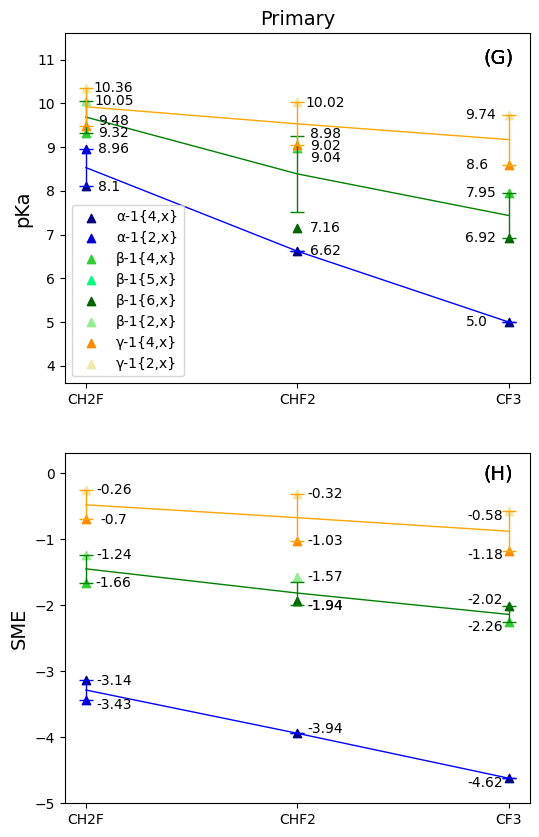

In [1123]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

cyclopropane_color = {1: 'midnightblue', 2: 'darkgreen'}
cyclobutane_color = {1: 'navy', 2: 'limegreen', 3: 'darkorange'}
cyclopentane_color = {1: 'royalblue', 2: 'springgreen', 3: 'navajowhite'}
cyclohexan_color = {1: 'lightsteelblue', 2: 'darkgreen', 3: 'goldenrod'}
cycloheptane_color = {1: 'slateblue', 2: 'mediumspringgreen', 3: 'limegreen'}
methane_color = {1: 'mediumblue', 2: 'lightgreen', 3: 'palegoldenrod'}

cyclopropane_name = {1: "", 2: "", 3: ""}
cyclobutane_name = {1: "α-1{4,x}", 2: "β-1{4,x}", 3: "γ-1{4,x}"}
cyclopentane_name = {1: "", 2: "β-1{5,x}", 3: ""}
cyclohexan_name = {1: "", 2: "β-1{6,x}", 3: ""}
cycloheptane_name = {1: "", 2: "", 3: ""}
methane_name = {1: "α-1{2,x}", 2: "β-1{2,x}", 3: "γ-1{2,x}"}  

line_color = {1: "blue", 2: "green", 3: "orange"}

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}, 4: {}}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))

for distance_global in range(1, 4):
    
    
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("="*30)
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP),
                                                    (cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        # print(X_local, y_relevance, color[distance_global], label[distance_global])
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -17, -6

            # print(X_local[i], y_relevance[i])
            if len(str(y_relevance[i])) == 3:
                x_shift -= 3
            
            if X_local[i] == "CH2F":
                if y_relevance[i] == -3.43:
                    y_shift = -7
            if X_local[i] == "CHF2":
                if y_relevance[i] == -1.94:
                    y_shift = -6
                elif y_relevance[i] == -3.94:
                    y_shift = 0
            if X_local[i] == "CF3":
                if y_relevance[i] == -2.02:
                    y_shift = 2
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        # ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            print(X_local[i], y_logP[i])
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -20, -3
            
            if len(str(y_logP[i])) == 3:
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_logP[i] == 9.48:
                    y_shift = 1
            elif X_local[i] == "CHF2":
                if y_logP[i] == 8.98:
                    y_shift = 7
                elif y_logP[i] == 9.02:
                    y_shift = -3
                elif y_logP[i] == 9.04:
                    y_shift = -12
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    # print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    ax1.set_ylim(-5, 0.3)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_ylabel("SME", fontsize=14)

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    ax2.set_ylim(3.6, 11.6)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_ylabel("pKa", fontsize=14)
    ax2.set_title("Primary", fontsize=14)

    ax2.text(1.88, 10.9, '(G)', fontsize = 14)
    ax1.text(1.88, -0.1, '(H)', fontsize = 14)

plt.show()  
    
    


--------

--------

--------

--------

--------

ACIDIC SME

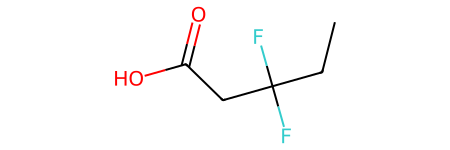

In [1124]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CCC(F)(F)CC(=O)O')

mol

In [1125]:

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "acid" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [1126]:
def find_the_closest_oxygen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'o':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance - 2

In [1127]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_oxygen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(O)C1CCC(F)(F)CC1 ((6, 7), (6, 8)) gem-CF2 3 cyclohexane
O=C(O)C1CCCCC1 () non-F inf cyclohexane
O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(O)C1CCC1 () non-F inf cyclobutane
O=C(O)C1(CF)CCC1 ((3, 4, 5),) CH2F 0 cyclobutane
O=C(O)C1(C(F)F)CCC1 ((3, 4, 5, 6),) CHF2 0 cyclobutane
O=C(O)C1(C(F)(F)F)CCC1 ((3, 4, 5, 6, 7),) CF3 0 cyclobutane
O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 2 cyclobutane
O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 2 cyclobutane
O=C(O)[C@H]1C[C@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 2 cyclobutane
O=C(O)[C@H]1C[C@@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 2 cyclobutane
O=C(O)[C@H]1C[C@H](CF)C1 ((5, 6, 7),) CH2F 2 cyclobutane
O=C(O)[C@H]1C[C@@H](CF)C1 ((5, 6, 7),) CH2F 2 cyclobutane
O=C(O)C1CC1(F)F ((5, 6), (5, 7)) gem-CF2 1 cyclopropane
O=C(O)C1CCC1(F)F ((6, 7), (

CH2F -0.33
CHF2 -0.37
CF3 -0.49
CH2F -0.18
CHF2 -0.32
CF3 -0.52
CH2F -0.21
CHF2 -0.33
CF3 -0.32
CHF2 -0.01


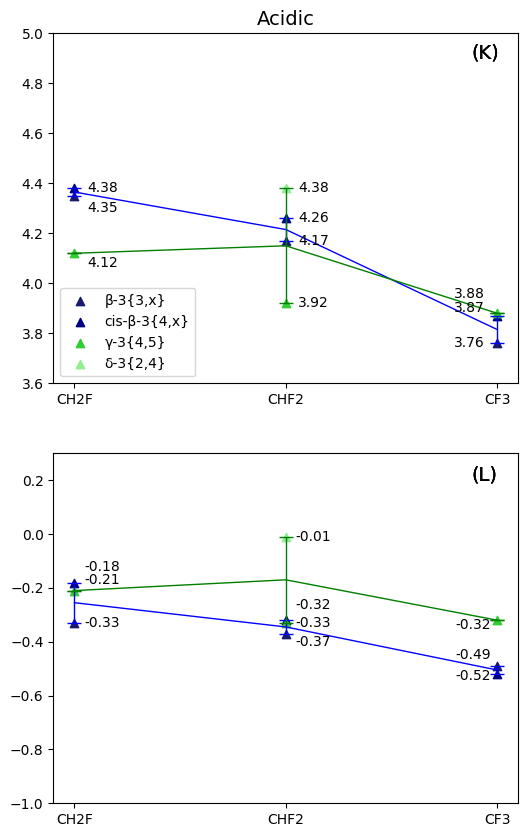

In [1128]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'midnightblue', 2: 'darkgreen'}
cyclobutane_color = {1: 'navy', 2: 'limegreen', 3: 'darkorange'}
cyclopentane_color = {1: 'royalblue', 2: 'springgreen', 3: 'navajowhite'}
cyclohexan_color = {1: 'lightsteelblue', 2: 'darkgreen', 3: 'goldenrod'}
cycloheptane_color = {1: 'slateblue', 2: 'mediumspringgreen', 3: 'limegreen'}
methane_color = {1: 'mediumblue', 2: 'lightgreen', 3: 'palegoldenrod'}

line_color = {1: "blue", 2: "green", 3: "orange"}

cyclopropane_name = {1: "β-3{3,x}", 2: "", 3: ""}
cyclobutane_name =  {1: "cis-β-3{4,x}", 2: "γ-3{4,5}", 3: ""}
cyclopentane_name = {1: "", 2: "", 3: ""}
cyclohexan_name =   {1: "", 2: "", 3: ""}
cycloheptane_name = {1: "", 2: "", 3: ""}
methane_name =      {1: "", 2: "δ-3{2,4}", 3: ""} 

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))

for distance_global in range(1, 4):
    
    
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    # print("Y_logP_dict", Y_logP_dict)
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        # print(X_local, y_relevance, color[distance_global], label[distance_global])
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -17, -6

            # print(len(str(y_logP[i])), y_relevance[i])
            if len(str(y_relevance[i])) == 3 or (len(str(y_relevance[i])) == 4 and '-' in str(y_relevance[i])):
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_relevance[i] == -0.18:
                    y_shift = 8
                elif y_relevance[i] == -0.21:
                    y_shift = 5
            
            if X_local[i] == "CHF2":
                if y_relevance[i] == -0.32:
                    y_shift = 8
                elif y_relevance[i] == -0.33:
                    y_shift = -3
                elif y_relevance[i] == -0.37:
                    y_shift = -9

            if X_local[i] == "CF3":
                if y_relevance[i] == -0.49:
                    y_shift = 5
                elif y_relevance[i] == -0.52:
                    y_shift = -4
            
            print(X_local[i], y_relevance[i])
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -20, -3
            
            if len(str(y_logP[i])) == 3:
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_logP[i] == 4.12:
                    y_shift = -10
                elif y_logP[i] == 4.35:
                    y_shift = -12
            
            if X_local[i] == "CF3":
                if y_logP[i] == 3.87:
                    y_shift = 3
                elif y_logP[i] == 3.88:
                    y_shift = 11
            
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    # print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    ax1.set_ylim(-1, 0.3)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    ax2.set_ylim(3.6, 5)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)

    ax2.text(1.88, 4.9, '(K)', fontsize = 14)
    ax1.text(1.88, 0.2, '(L)', fontsize = 14)

    ax2.set_title("Acidic", fontsize=14)
    ax2.legend(loc='lower left')

plt.show() 
    
    
